# Episode 3 -- Summary Statistics

Problem: Given a bunch of datapoints:

* characterize the distribution in one or two values
* Characterization should be robust to outliers

Equivalent of an elevator pitch for a data sets.

Problem: This is inherently impossible

## Mean Value

The _mean value_ of $x_1, \dots, x_n$ is defined as

$$ \mu = mean(x_1, \dots, x_n) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


## Creating Ruplots
plt.figure(figsize=(10,0.5)) # Use smaller image canvas

# Seaborn provides a built-in method for Rugplots
# semi-colon ';' suppresses text output
# for some resason the default color
# sns.rugplot(X, color="blue"); 

colors = sns.color_palette("Blues_d")

mean= 1316.30863471


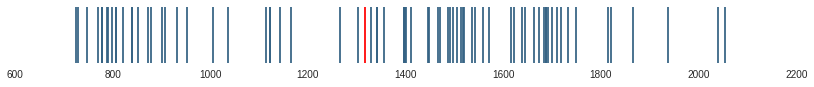

In [2]:
def mean(X):
    return float(sum(X)) / len(X)

X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
print "mean=", mean(X)

# Plot
def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean(X):
    ax = sns.rugplot(X, color=colors[1], height=1)
    mark(mean(X))
    ax.set(yticks=[])

plt.figure(figsize=(14,1))
plot_mean(X)

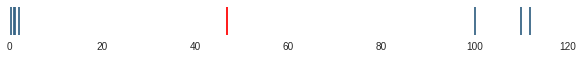

In [3]:
# Mean values can be atypical
plt.figure(figsize=(10,.5))
plot_mean([1,2,0.4,1.2,100,110,112])

# Application: Plotting

* A monitoring graph rarely shows you the full data: Not enough pixels!
* Need to choose an summary statistic to pre-aggregate the data.
* Common choice: mean

## Peak Erosion is caused by mean-aggregation (default)

<figure>
<img src="img/peak_erosion_1.png" width="80%">
<img src="img/peak_erosion_2.png" width="80%">
<figcaption>Peak erosion: Same peak is shown with height 0.08 and 0.03</figcaption>
</figure>

To avoid peak erosion use either:

* Histogram Aggregation

<figure>
<img src="img/example_peak_histogram.png" width="80%">
<figcaption>Peak erosion: Show all collected data using histogram aggregation</figcaption>
</figure>

* Demo Histogram: https://parlette.circonus.com/trending/graphs/edit/3447a986-d388-4191-82c9-cdacc1af9c79
* Share: https://share.circonus.com/shared/graphs/3447a986-d388-4191-82c9-cdacc1af9c79/i6PIm8

* Another example
<img src="img/example_histogram_aggregation2.png">

* Max Aggregation

<figure>
<img src="img/peak_erosion_3.png" width="80%">
<figcaption>Peak erosion: Same peak is shown with height 0.08 and 0.03</figcaption>
</figure>

* Demo: https://parlette.circonus.com/trending/graphs/view/65d896dd-2be3-4be9-a76d-6fec209358b1
* Share: https://share.circonus.com/shared/graphs/65d896dd-2be3-4be9-a76d-6fec209358b1/bZ7pNb

# Deviation Measures

1. The _maximal deviation_ is defined as

$$ maxdev(x_1,\dots,x_n) = max \{ |x_i - \mu| \,|\, i=1,\dots,n\}.$$

2. The _mean absolute deviation_ is defined as

$$ mad(x_1,\dots,x_n) = \frac{1}{n} \sum_{i=1}^n |x_i - \mu|.$$

3. The _standard deviation_ is defined as

$$ \sigma = stddev(x_1,\dots,x_n) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}.$$


* Measure the 'typical' displacement from the mean value.
* Standard deviation is popular because it has extremely nice mathematical properties.

In [4]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

# Plotting helper function
def plot_mean_dev(X, m, s, new_canvas=True):
    print "mean = ", m
    print "dev  = ", s
    if new_canvas: plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey')
    plt.plot([m,m],[0,-0.09],'r-' )
    plt.plot([m-s,m-s],[0,-0.08],'b-')
    plt.plot([m+s,m+s],[0,-0.08],'b-')
    plt.plot([m-s,m+s],[-0.04,-0.04],'b--')
    if new_canvas:  plt.show()

Maximal deviation
mean =  1316.30863471
dev  =  738.072957089


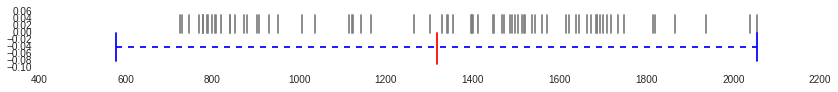

Standard Deviation
mean =  1316.30863471
dev  =  374.572363954


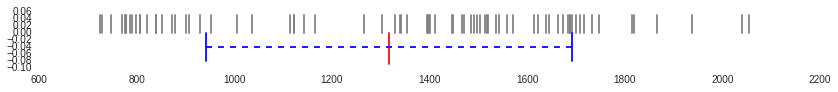

Mean Absolute Deviation
mean =  1316.30863471
dev  =  327.4656915


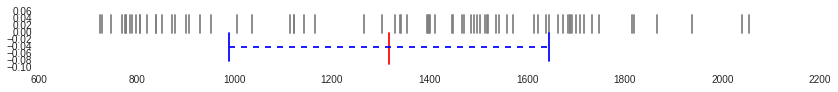

In [5]:
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
    
print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

In [96]:
X = np.genfromtxt("/home/hartmann/Downloads/3447a986-d388-4191-82c9-cdacc1af9c79 (1)", delimiter=",")[:,1]
X = X[~np.isnan(X)]

len(X[X < mean(X) + stddev(X)]) / float(len(X))

m = mean(X)
s = mad(X)
len( [ x for x in X if (m - s < x) and (x < m + s)] ) / float(len(X))

0.5236768802228412

In [61]:
len(X)

1436

mean= 0.0149601582094


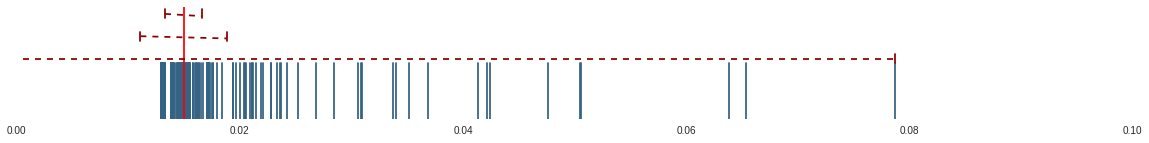

In [82]:
print "mean=", mean(X)

colors = sns.color_palette("Blues_d")

# plt.plot(X)


plt.figure(figsize=(20,2))
ax = sns.rugplot(X, height=0.5, color=colors[1])
ax.set(yticks=[])
ax.set_xlim(0,0.1)

# plt.hist(X)

m = mean(X)
plt.plot([m,m],[0,1],'r-' )

s = max_dev(X)
color = "darkred"
offset = 0.5
plt.plot([m-s,m-s],[offset,offset + 0.08],'-', color=color)
plt.plot([m+s,m+s],[offset,offset + 0.08],'-', color=color)
plt.plot([m-s,m+s],[offset + 0.04, offset + 0.04],'--', color=color)

s = stddev(X)
color = "darkred"
offset = 0.7
plt.plot([m-s,m-s],[offset,offset + 0.08],'-', color=color)
plt.plot([m+s,m+s],[offset,offset + 0.08],'-', color=color)
plt.plot([m-s,m+s],[offset + 0.04, offset + 0.02],'--', color=color)

s = mad(X)
color = "darkred"
offset = 0.9
plt.plot([m-s,m-s],[offset,offset + 0.08],'-', color=color)
plt.plot([m+s,m+s],[offset,offset + 0.08],'-', color=color)
plt.plot([m-s,m+s],[offset + 0.04, offset + 0.02],'--', color=color)

mean =  -0.00876861991972
dev  =  1.00498583201


IndexError: index 2552 is out of bounds for axis 1 with size 2544

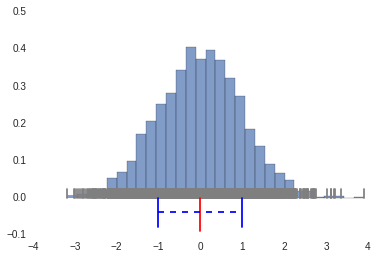

In [87]:
# Standard deviation is a good deviation for normal distributed data
X = np.array([ np.random.normal() for x in range(3000) ])
plt.hist(X, bins=30, alpha=0.7, normed=True)
plot_mean_dev(X,mean(X),stddev(X), False)


len(X[X < mean(X) + stddev(X)][X > mean(X) + stddev(X)]) / float(len(X))

In [95]:
m = mean(X)
s = stddev(X)
len( [ x for x in X if (m - s < x) and (x < m + s)] ) / float(len(X))

0.684

Maximal deviation
mean =  0.0496609932381
dev  =  199.950339007


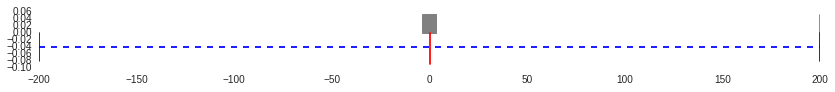

Standard Deviation
mean =  0.0496609932381
dev  =  3.78721705113


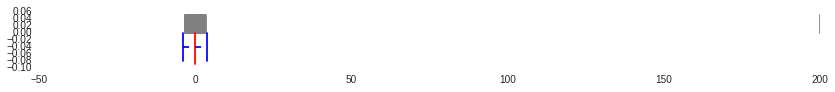

Mean Absolute Deviation
mean =  0.0496609932381
dev  =  0.876172782135


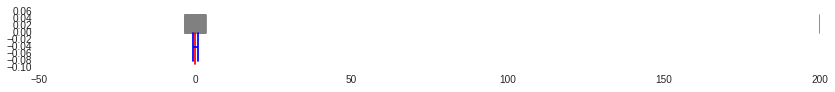

In [9]:
# Large effect on Outliers
X = X + [200]

print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

## Caution with Standard Deviation

- Everybody Learns about standard deviation in school
- Beautiful mathematical properties!
- Everybody knows 
  - "68% of data falls within 1 std-dev of the mean"
  - "95% falls within 2 std-dev of the mean"
  - "99.7" falls within 3 std-dev of the mean"
* "Problem is: this is utter nonsense". Only true for normally distributed data.

* Not good for measuring outliers!


_Source:_ Janert - Data Analysis with Open Source Tools

## War Story:

- Looking at SLA for DB response times
- Outlier defined as value larger than $\mu + 3\sigma$
- Look at code: Takes '0.3' percentile!
- So always have outliers.
- And 0.3-percentile was way too large (hours of latency).
- Programmer changed code for 1%, 5%, 10% quantiles.
- Finally handcoded a threshold
- The SLA was never changed

Source: Janert - Data Analysis with Open Source Tools